In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Number of points
N = 100

In [16]:
# Initial a random set of N points with coordinates in [0,300)x[0,300):
P = np.array([(np.random.randint(0, 300), np.random.randint(0, 300)) for _ in range(N)])
P

array([[ 71, 195],
       [ 54,  22],
       [187, 221],
       [102,   8],
       [112,  71],
       [191, 118],
       [285, 179],
       [128, 148],
       [ 40,   2],
       [ 62,  98],
       [229, 154],
       [137,  71],
       [267,  36],
       [252,  98],
       [167, 101],
       [218,  11],
       [218,   9],
       [294, 222],
       [ 61, 163],
       [182, 132],
       [195,  57],
       [292, 156],
       [273,  50],
       [134, 104],
       [223, 146],
       [155,  47],
       [ 99, 154],
       [119, 258],
       [242, 240],
       [250, 188],
       [105, 112],
       [283, 166],
       [181, 252],
       [ 89, 100],
       [ 97,  85],
       [169, 153],
       [ 39, 188],
       [ 37,   4],
       [  6, 261],
       [118, 139],
       [193, 288],
       [282,  78],
       [268, 290],
       [120, 180],
       [272, 276],
       [281, 244],
       [192, 249],
       [115, 133],
       [239,  42],
       [ 65, 113],
       [182, 190],
       [149, 244],
       [124,

In [17]:
# Function to know if we have a CCW turn
def CCW(p1, p2, p3):
	if (p3[1] - p1[1]) * (p2[0] - p1[0]) >= (p2[1] - p1[1]) * (p3[0] - p1[0]):
		return True
	return False

In [18]:
n = len(P)
result = [None] * n
l = np.where(P[:,0] == np.min(P[:,0]))
pointOnHull = P[l[0][0]]

In [19]:
i = 0
while True:
    result[i] = pointOnHull
    endpoint = P[0]
    for j in range(1,n):
        if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(P[j], result[i], endpoint):
            endpoint = P[j]
    i = i + 1
    pointOnHull = endpoint
    if endpoint[0] == result[0][0] and endpoint[1] == result[0][1]:
        break

In [20]:
for i in range(n):
    if result[-1] is None:
        del result[-1]

In [21]:
L = np.array(result)

In [22]:
# figure out result
def draw(L, P, path=None):
    plt.figure()
    plt.plot(L[:, 0], L[:, 1], 'b-', picker=5)
    plt.plot([L[-1, 0], L[0, 0]], [L[-1, 1], L[0, 1]], 'b-', picker=5)
    plt.plot(P[:, 0], P[:, 1], ".r")
    plt.axis('off')
    if path:
        plt.savefig(path)
    plt.show()

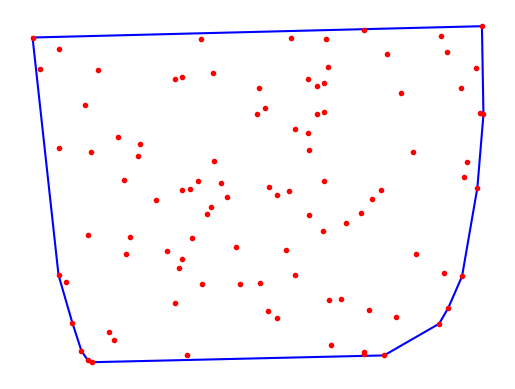

In [24]:
result_path = 'Jarvis_March_Result.png'
draw(L, P, path=result_path)